In [106]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [107]:
def sigmoid(x, beta, yscale=1, xscale=0, up_shift=0):
    """
    If we set beta suitably large then we can approximate a verticla line at the discountinuity 
    representing something continous. 
    :param x: 
    :param beta: 
    :param up_shift: 
    :param scale: 
    :return: 
    """
    return yscale* (1 / (1 + np.exp(-beta*(x-xscale)))) + up_shift


In [108]:
def inv_sigmoid(x,beta, v_scale,x_scale=0, y_scale=0):
    """
    If we set beta suitably large then we can approximate a verticla line at the discountinuity 
    representing something continous. This is not actually the inverse of sigmoid function, 
    this represents a π rotation of the sigmoid function 
    :param x: 
    :param beta: 
    :param up_shift: 
    :param scale: 
    :return: 
    """
    return v_scale*np.exp(-np.exp(beta*(x-x_scale))) + y_scale


1000
4.59932847021 4.5
4.6 4.5
4.6 4.5
4.6 4.5


/Users/bradley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in exp


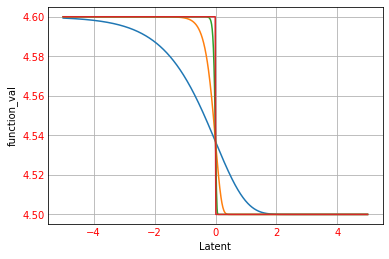

In [114]:
limit = 5
delta = 0.025
beta = [1,5,25,1000] # alters how steep
vscale = [0.1] # alters the vertical scaling, in this case we want it to range on the y-axis from v_scale * 1 <= y <= x_scale
yscale = [4.5] #makes this the new starting point

xscale = 0
x_plus = xscale + delta
x_min   = xscale - delta
delta = [0.001]
x = np.arange(-limit, limit,step=0.01)
print(len(x))
# y = inv_sigmoid(x)
fig, ax = plt.subplots()
ax.grid(True, which= 'both')
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('Latent')
ax.set_ylabel('function_val')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
for i in beta:
        y = inv_sigmoid(x,i,vscale,xscale,yscale)
        # indices = np.where((x > x_min) & (x < x_plus))[0]
        # y_new = y[indices]
        # ax.plot(x[indices],y_new)
        print(np.max(y),np.min(y))
        ax.plot(x, y)
# print(indices)
# print(type(y))


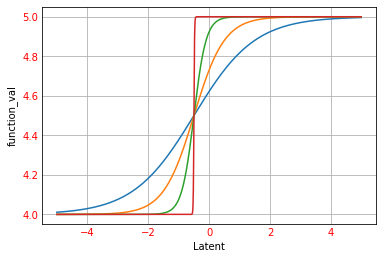

In [116]:
limit = 5
x = np.arange(-limit,limit,step=0.01)
delta = 0.025
beta = [1, 2,5,100]
upshift = [4] 
yscale = [1]
xscale = [-0.5] # moves it either left or right on the x-axis  
fig, ax  = plt.subplots()
for i in beta:
    for j in yscale:
        for k in xscale:
            for l in upshift:
              y = sigmoid(x, i, j, k,l)
              ax.plot(x, y, label = "With beta=  {0} and shift {1}".format(i,j))
ax.grid(True, which= 'both')
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('Latent')
ax.set_ylabel('function_val')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
# print(y[1:100])

0.288674852635
0.220524882039


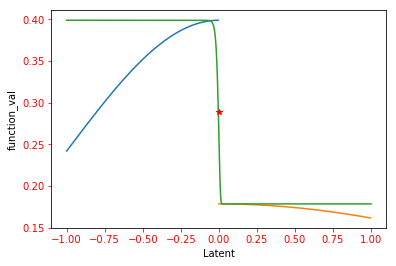

In [126]:
import scipy.stats as ss

limit = 1
dx = 0.001
discont = 0
x = np.linspace(-limit,limit,1000)
fig, ax  = plt.subplots()
normal = ss.multivariate_normal(mean = 0, cov = 1)
x1=  np.arange(-limit,0,0.005)
samples = normal.pdf(x1)
ax.plot(x1,samples)
normal2 = ss.multivariate_normal(mean=0,cov=5)
x2 = np.arange(0,limit, 0.005)
samples2 = normal2.pdf(x2)
ax.plot(x2,samples2)

midpoint  = 0.5*(np.max(samples) + np.max(samples2))
print(midpoint)
discont = 0
beta = 100
yscale = np.max(samples2)
vscale = np.max(samples) - yscale
print(vscale)
xscale = 0
y = inv_sigmoid(x, beta, vscale, xscale, yscale)
ax.plot(x, y)
# print(y)
ax.plot(midpoint, 'r*')
ax.set_xlabel('Latent')
ax.set_ylabel('function_val')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
# Note, we could use something like np.clip(array, min_val, max_val)


0.288677122993
-0.220530314817


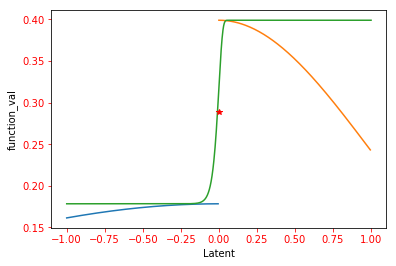

In [121]:
limit = 1
dx = 0.001
discont = 0
x = np.linspace(-limit,limit,1000)
fig, ax  = plt.subplots()
normal = ss.multivariate_normal(mean = 0, cov = 5)
x1=  np.arange(-limit,0,0.005)
samples = normal.pdf(x1)
ax.plot(x1,samples)
normal2 = ss.multivariate_normal(mean=0,cov=1)
x2 = np.arange(0,limit, 0.005)
samples2 = normal2.pdf(x2)
ax.plot(x2,samples2)

midpoint  = 0.5*(np.max(samples) + np.max(samples2))
print(midpoint)
discont = 0
beta = 40
yscale = np.max(samples2)
vscale = np.max(samples) - yscale
print(vscale)
xscale = 0
y = inv_sigmoid(x, beta, vscale, xscale, yscale)
ax.plot(x, y)
# print(y)
ax.plot(midpoint, 'r*')
ax.set_xlabel('Latent')
ax.set_ylabel('function_val')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
